In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\Telco_dataset.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,Stayed
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned


In [5]:
df.shape

(7043, 22)

In [31]:
# replace blank with 0 as tenure is 0 and no total charges are recorder 

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [9]:
df.isnull().sum().sum()

0

In [11]:
df.describe()

,Unnamed: 0,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,64.761692,2279.734304
std,2033.283305,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,1760.500000,9.000000,35.500000,398.550000
50%,3521.000000,29.000000,70.350000,1394.550000
75%,5281.500000,55.000000,89.850000,3786.600000
max,7042.000000,72.000000,118.750000,8684.800000


In [13]:
df["customerID"].duplicated().sum()

0

In [55]:
# converted o and 1 values of senior citizen  to yes/no  to make it easier to  understand 

In [15]:
def convert(values):
    if values == 1:
        return "yes"
    else:
        return "no"


df["SeniorCitizen"] = df["SeniorCitizen"].apply(convert)

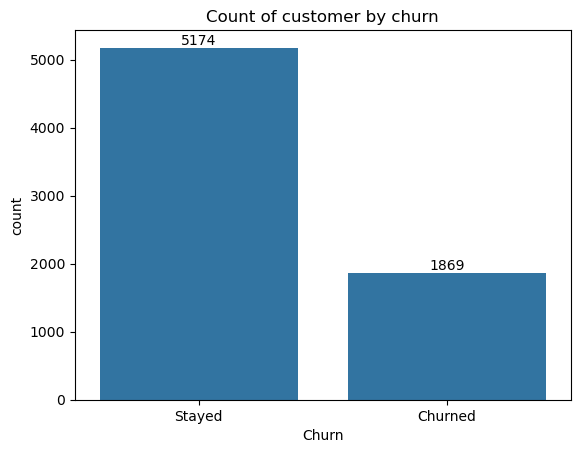

In [17]:
ax = sns.countplot(x = "Churn" ,data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by churn")
plt.show()

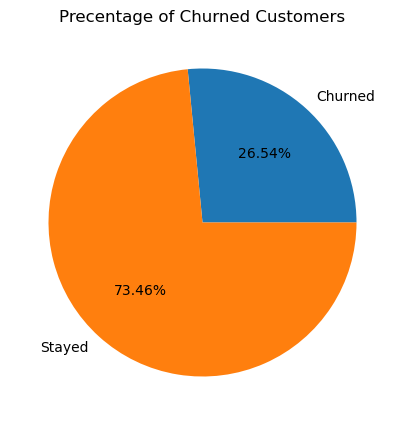

In [94]:
plt.figure(figsize = (5,5))
gb =  df.groupby('Churn').agg({'Churn' : 'count'})
plt.pie(gb['Churn'],labels = gb.index,autopct = "%1.2f%%" )
plt.title("Precentage of Churned Customers")
plt.show()

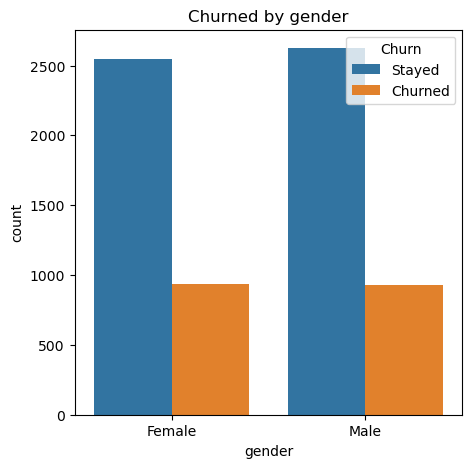

In [104]:
plt.figure(figsize  = (5,5))
sns.countplot(x = "gender" , data = df, hue = "Churn")
plt.title("Churned by gender")
plt.show()

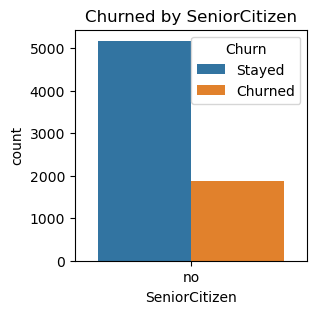

In [112]:
plt.figure(figsize  = (3,3))
sns.countplot(x = "SeniorCitizen" , data = df , hue = "Churn")
plt.title("Churned by SeniorCitizen")
plt.show()

In [ ]:
# comprative a greted percentage of peple in senion citizen category have churned  

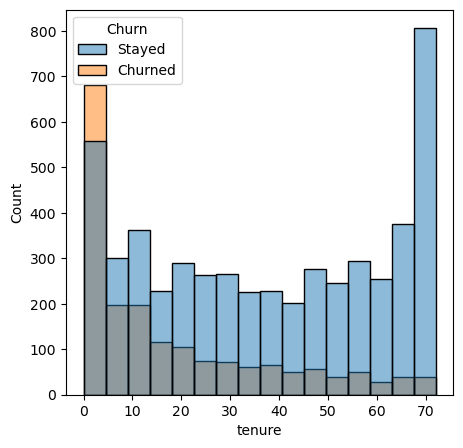

In [118]:
plt.figure(figsize  = (5,5))
sns.histplot( x = "tenure" , data = df , hue = "Churn")
plt.show()

In [ ]:
# people who have used our servise long time have stayed peploe who have used our servise 1 or two month churned 

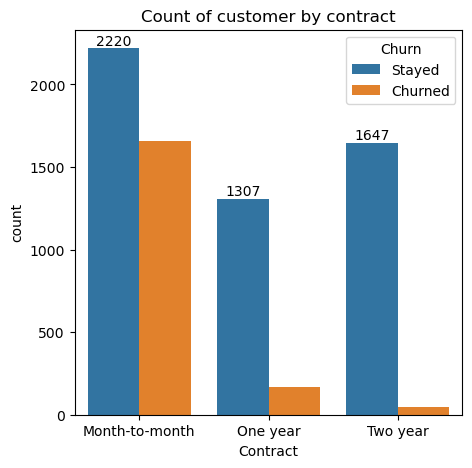

In [124]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'Contract', data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customer by contract")
plt.show()

In [ ]:
#   people who have month to month contract are likely to churn then from those who have 1 or 2 year of contract 

In [128]:
df.columns.values

array(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'], dtype=object)

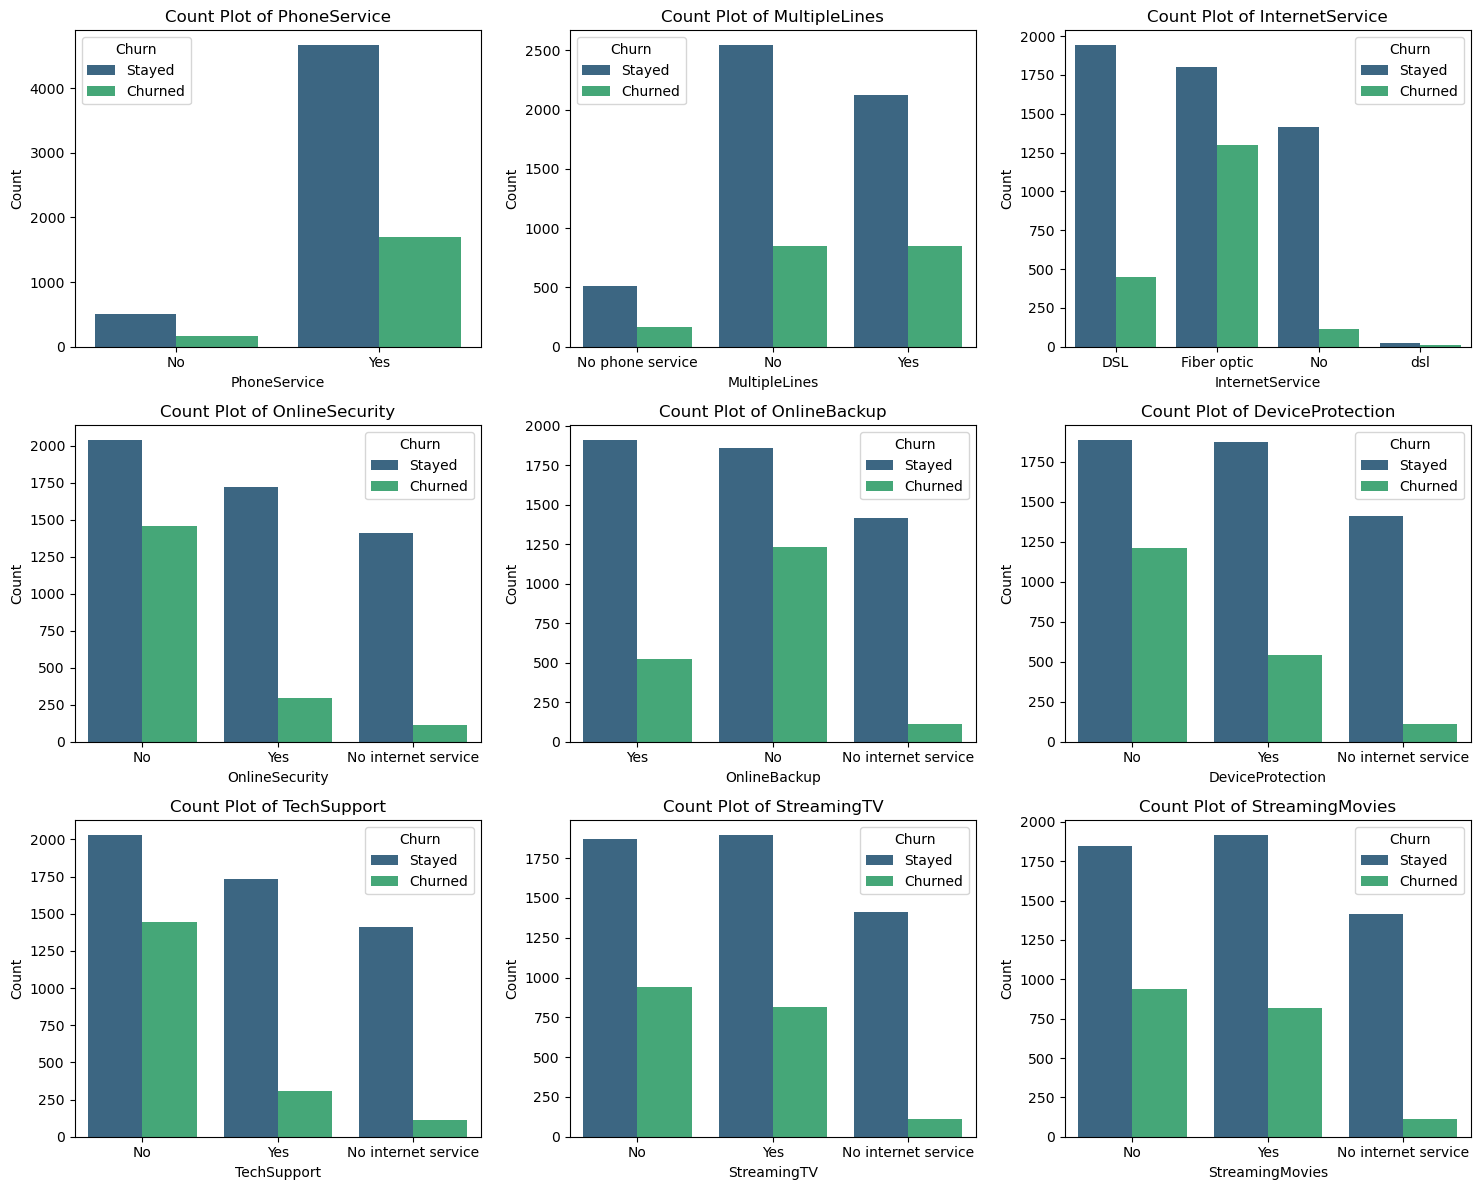

In [146]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies']
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"], palette="viridis")
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


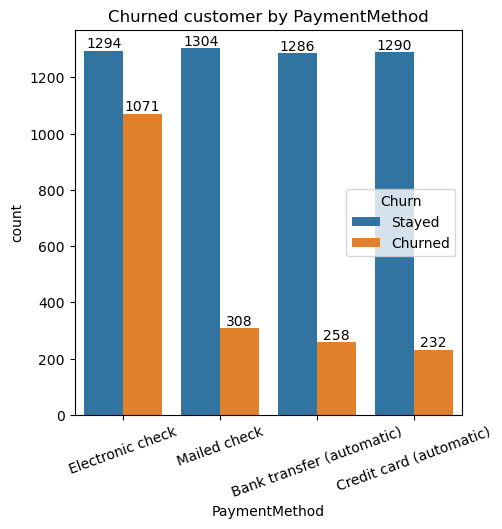

In [156]:

plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned customer by PaymentMethod")
plt.xticks(rotation = 20)
plt.show()